# Capstone Project 1
## Storytelling Report

In [1]:
%load_ext autoreload
%autoreload 2

#
# Imports.
#
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import Parallel, delayed
import operator
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from scipy import stats

from crycompare import *

%matplotlib inline

In [47]:
#
# Obtain the price history (close, high, low, open) for bitcoin(BTC) using the crycompare library.
#
h = History()
btc_hist = h.histoDay('BTC', 'USD', allData=True)
if btc_hist['Data']:
    df_btc = pd.DataFrame(btc_hist['Data'])
    df_btc['time'] = pd.to_datetime(df_btc['time'], unit='s')
    df_btc.index = df_btc['time']
    del df_btc['time']
    
#
# Print the first 10 entries.
#
df_btc.head(10)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600
2010-07-22,0.05050,0.08181,0.05050,0.07921,2160.00,129.7800
2010-07-23,0.06262,0.06767,0.05050,0.05050,2402.50,141.0700
2010-07-24,0.05454,0.06161,0.05049,0.06262,496.32,26.7300
2010-07-25,0.05050,0.05941,0.05050,0.05454,1551.48,85.0600


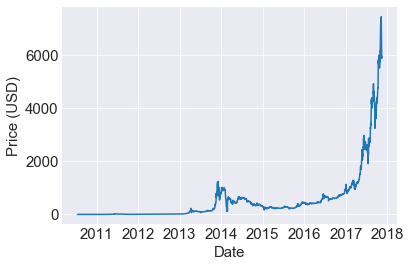

In [49]:
#
# Plot the closing price of bitcoin over time.
#
sns.set_style("darkgrid")
plt.plot(df_btc.close)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [50]:
#
# Obtain the price history (close, high, low, open) for litecoin(LTC) using the crycompare library.
#
ltc_hist = h.histoDay('LTC', 'USD', allData=True)
if ltc_hist['Data']:
    df_ltc = pd.DataFrame(ltc_hist['Data'])
    df_ltc['time'] = pd.to_datetime(df_ltc['time'], unit='s')
    df_ltc.index = df_ltc['time']
    del df_ltc['time']
 
    
#
# Print the first 10 entries.
#
df_ltc.head(10)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2013-10-24,3.0,3.0,3.0,3.0,2.71,8.12
2013-10-25,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-26,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-27,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-28,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-29,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-30,3.0,3.0,3.0,3.0,0.00,0.00
2013-10-31,3.0,3.0,3.0,3.0,0.00,0.00
2013-11-01,3.0,3.0,3.0,3.0,0.00,0.00


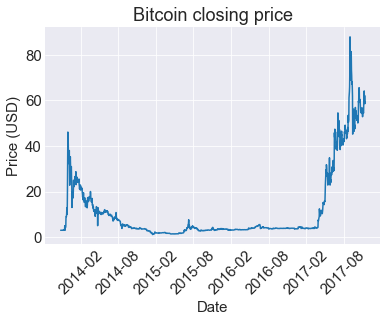

In [51]:
#
# Plot the closing price of litecoin over time.
#
sns.set_style("darkgrid")
plt.plot(df_ltc.close)
plt.xticks(rotation=45)
plt.title("Bitcoin closing price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [52]:
#
# Merge bitcoin and litecoin into a single dataframe.
#
df_coins = pd.concat([df_btc, df_ltc], axis=1)
df_coins.columns = ['btc_close','btc_high','btc_low','btc_open','btc_volfrom','btc_volto','ltc_close','ltc_high', \
                    'ltc_low','ltc_open','ltc_volfrom','ltc_volto']

#
# Print the first 10 entries.
#
df_coins.head(10)

,btc_close,btc_high,btc_low,btc_open,btc_volfrom,btc_volto,ltc_close,ltc_high,ltc_low,ltc_open,ltc_volfrom,ltc_volto
time,,,,,,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-22,0.05050,0.08181,0.05050,0.07921,2160.00,129.7800,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-23,0.06262,0.06767,0.05050,0.05050,2402.50,141.0700,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-24,0.05454,0.06161,0.05049,0.06262,496.32,26.7300,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-25,0.05050,0.05941,0.05050,0.05454,1551.48,85.0600,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#
# Print the dataframe info.
#
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2677 entries, 2010-07-17 to 2017-11-13
Freq: D
Data columns (total 12 columns):
btc_close      2677 non-null float64
btc_high       2677 non-null float64
btc_low        2677 non-null float64
btc_open       2677 non-null float64
btc_volfrom    2677 non-null float64
btc_volto      2677 non-null float64
ltc_close      1482 non-null float64
ltc_high       1482 non-null float64
ltc_low        1482 non-null float64
ltc_open       1482 non-null float64
ltc_volfrom    1482 non-null float64
ltc_volto      1482 non-null float64
dtypes: float64(12)
memory usage: 271.9 KB


### From the dataframe info, we can see that there are more bitcoin entries than there are litecoin.  This is due to the fact that bitcoin was founded before litecoin and thus has more historical data.  Only the last two years worth of data will be explored so only the overlapping data between bitcoin and litecoin will be kept.

In [8]:
#
# Remove entries where the litecoin close is NaN.
#
df_coins = df_coins[np.isfinite(df_coins.ltc_close)]

#
# Print the dataframe info.
#
df_coins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1481 entries, 2013-10-24 to 2017-11-12
Freq: D
Data columns (total 12 columns):
btc_close      1481 non-null float64
btc_high       1481 non-null float64
btc_low        1481 non-null float64
btc_open       1481 non-null float64
btc_volfrom    1481 non-null float64
btc_volto      1481 non-null float64
ltc_close      1481 non-null float64
ltc_high       1481 non-null float64
ltc_low        1481 non-null float64
ltc_open       1481 non-null float64
ltc_volfrom    1481 non-null float64
ltc_volto      1481 non-null float64
dtypes: float64(12)
memory usage: 150.4 KB


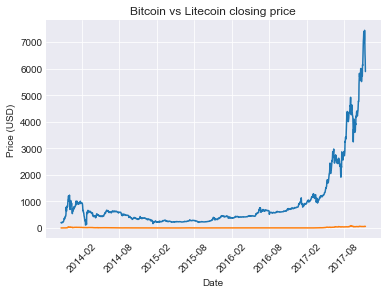

In [9]:
#
# Plot the two coins on the same plot.
#
sns.set_style("darkgrid")
plt.plot(df_coins.btc_close)
plt.plot(df_coins.ltc_close)
plt.xticks(rotation=45)
plt.title("Bitcoin vs Litecoin closing price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

### This plot isnt very helpful as the price difference between the two coins is too large to be shown without some normalization.

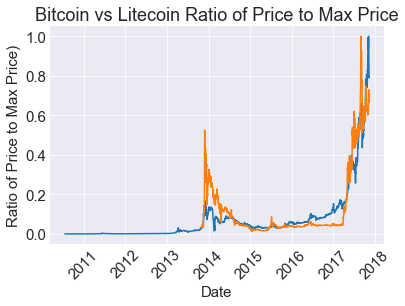

In [54]:
#
# Plot the two coins on the same plot but normalized.
#
sns.set_style("darkgrid")
plt.plot(df_coins.btc_close / df_coins.btc_close.max())
plt.plot(df_coins.ltc_close / df_coins.ltc_close.max())
plt.xticks(rotation=45)
plt.title("Bitcoin vs Litecoin Ratio of Price to Max Price")
plt.xlabel("Date")
plt.ylabel("Ratio of Price to Max Price)")
plt.show()

### Now that historical for both bitcoin and litecoin has been gathered and cleaned, the Google keyword search trend data needs to be obtained.

In [59]:
#
# Query Google for the keyword serach trend.
#
bitcoin = TrendReq()
litecoin = TrendReq()
btc_kwrd = ["bitcoin price"]
ltc_kwrd = ["litecoin price"]
bitcoin.build_payload(btc_kwrd)
litecoin.build_payload(ltc_kwrd)

#
# Obtain the intrest over time.  Resample by day and interpolate between points.
#
df_kwrd_bitcoin = bitcoin.interest_over_time()
df_kwrd_litecoin = litecoin.interest_over_time()

#
# Print the last 10 entries for bitcoin to understand what the dataframe looks like.
#
df_kwrd_bitcoin.tail(10)

,bitcoin price,isPartial
date,,
2017-09-03,58,False
2017-09-10,74,False
2017-09-17,52,False
2017-09-24,40,False
2017-10-01,35,False
2017-10-08,59,False
2017-10-15,63,False
2017-10-22,66,False
2017-10-29,94,False


### It appears that the data from Google is by week.  However, the price data is by day.  To remedy this problem the Google trend data will be intrepolated between weeks to obtain a daily estimate.  Also, the 'isPartial' feature is not needed so should be removed from the dataframe to keep it uncluttered.

In [60]:
df_kwrd_bitcoin = df_kwrd_bitcoin.resample('D').interpolate(method='linear')
df_kwrd_litecoin = df_kwrd_litecoin.resample('D').interpolate(method='linear')
del df_kwrd_bitcoin['isPartial']
del df_kwrd_litecoin['isPartial']

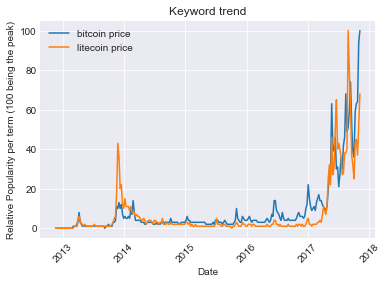

In [12]:
#
# Plot the two keywords on the same plot.
#
sns.set_style("darkgrid")
plt.plot(df_kwrd_bitcoin[btc_kwrd])
plt.plot(df_kwrd_litecoin[ltc_kwrd])
plt.legend([btc_kwrd[0], ltc_kwrd[0]])
plt.xticks(rotation=45)
plt.title("Keyword trend")
plt.xlabel("Date")
plt.ylabel("Relative Popularity per term (100 being the peak)")
plt.show()

In [13]:
#
# Instert the keyword search data into the df_coins dataframe.
#
df_coins['btc_kwrd'] = df_kwrd_bitcoin[btc_kwrd[0]]
df_coins['ltc_kwrd'] = df_kwrd_litecoin[ltc_kwrd[0]]

### The Google keyword search trend data is now properly in memory in one dataframe.  Some EDA will be performed to look for any trends that are worth further exploration.

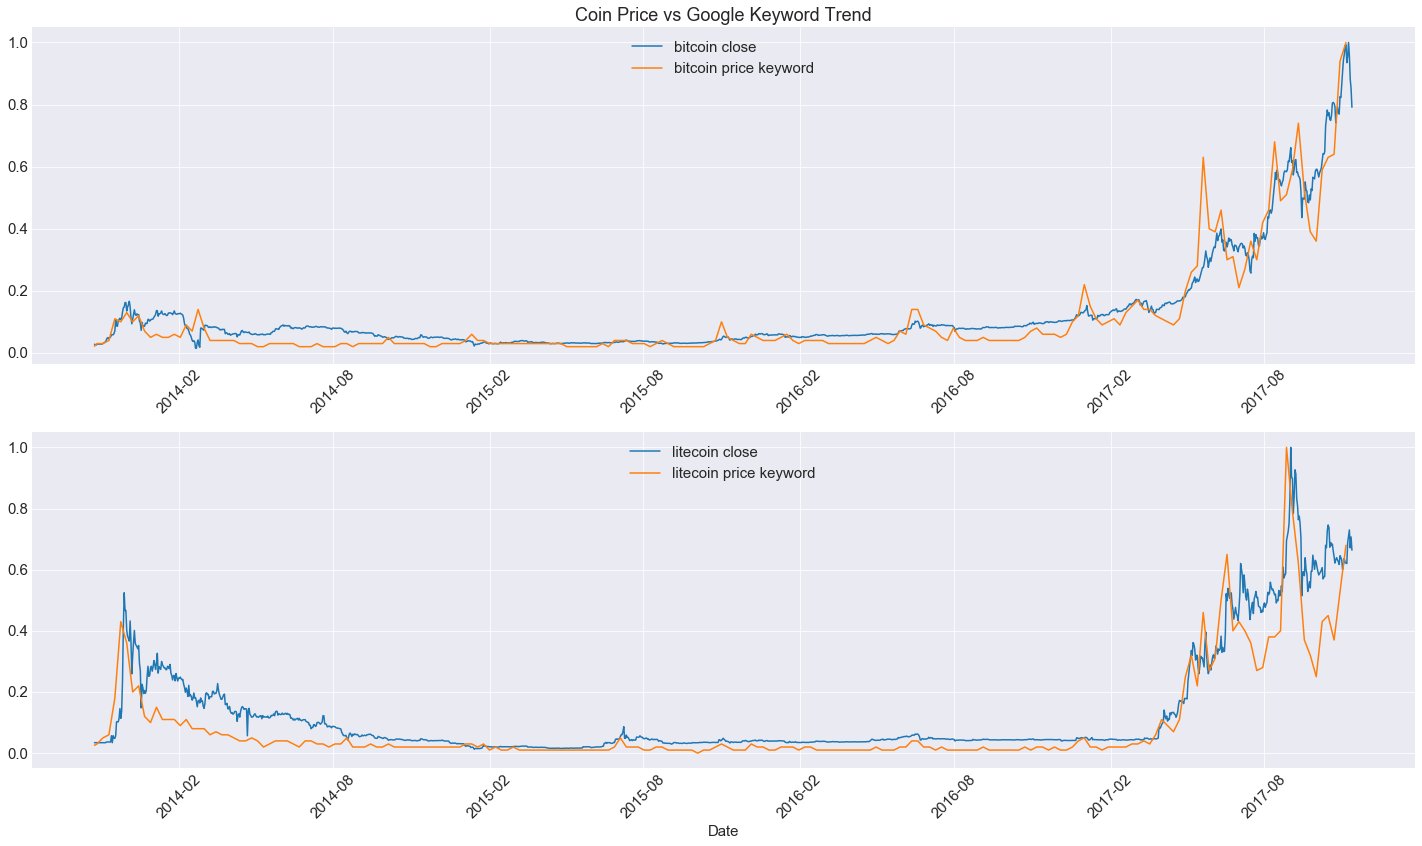

In [14]:
#
# Plot price vs keyword on the same plot.
#
plt.rcParams.update({'font.size': 15})
sns.set_style("darkgrid")
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(211)
plt.title("Coin Price vs Google Keyword Trend")
ax.plot(df_coins.btc_close / df_coins.btc_close.max())
ax.plot(df_coins.btc_kwrd / df_coins.btc_kwrd.max())
ax.legend(["bitcoin close", btc_kwrd[0] + " keyword"],loc="upper center")
plt.xticks(rotation=45)
ax = fig.add_subplot(212)
ax.plot(df_coins.ltc_close / df_coins.ltc_close.max())
ax.plot(df_coins.ltc_kwrd / df_coins.ltc_kwrd.max())
ax.legend(["litecoin close",  ltc_kwrd[0] + " keyword"], loc="upper center")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.tight_layout()
plt.show()

### At first glance, the Google search trend data appears to be strongly coorelated with the price of its respective coin.  Also, the data does not appear to be very interesting before the year 2016 so only that data will explored further.  First, lets plot only that data.

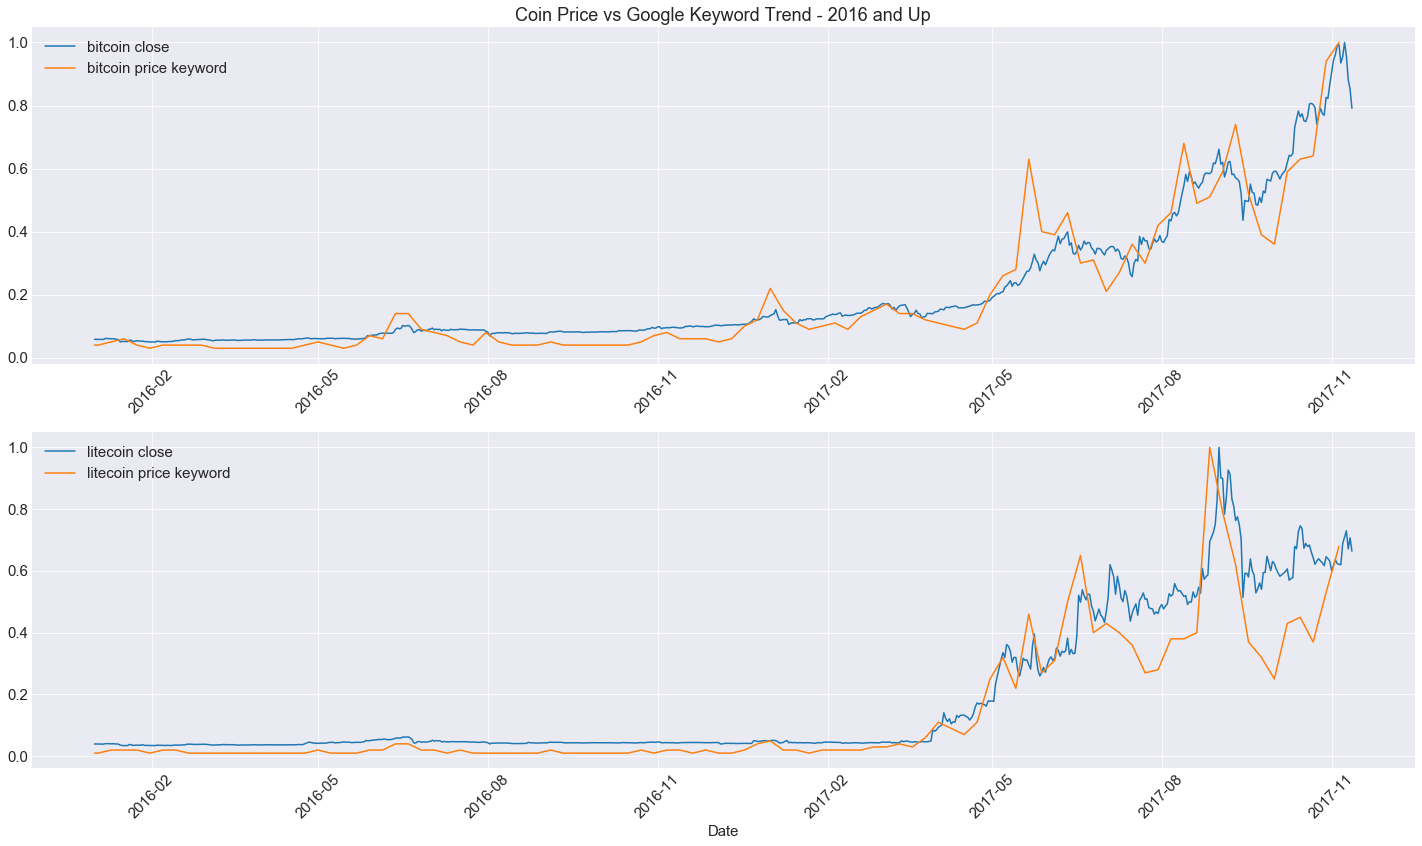

In [15]:
#
# Obtain 2016 and on.
#
year = '2016'

#
# Plot price vs keyword on the same plot for 2016 and on.
#
plt.rcParams.update({'font.size': 15})
sns.set_style("darkgrid")
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(211)
plt.title("Coin Price vs Google Keyword Trend - " + year + " and Up")
ax.plot(df_coins[year:].btc_close / df_coins[year:].btc_close.max())
ax.plot(df_coins[year:].btc_kwrd / df_coins[year:].btc_kwrd.max())
ax.legend(["bitcoin close", btc_kwrd[0] + " keyword"], loc="upper left")
plt.xticks(rotation=45)
ax = fig.add_subplot(212)
ax.plot(df_coins[year:].ltc_close / df_coins[year:].ltc_close.max())
ax.plot(df_coins[year:].ltc_kwrd / df_coins[year:].ltc_kwrd.max())
ax.legend(["litecoin close", ltc_kwrd[0] + " keyword"], loc="upper left")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.tight_layout()
plt.show()